### Import necessary libraries

In [13]:
#To read the dataset
import pandas as pd 
import datetime as dt
import numpy as np

#For visualization
import matplotlib.pyplot as plt

### Read the dataset using Pandas

In [3]:
#Read the dataset
uber_df= pd.read_csv("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Devtern\\Task 2\\Data\\uber-raw-data-sep14.csv")

#Display the first 5 records
uber_df.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
#Display the last 5 records
uber_df.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [5]:
#Find the shape of the dataset
uber_df.shape

(1028136, 4)

### Explore the dataset properties

In [6]:
#Understand the dataset properties
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [25]:
#Change the "Date/Time" column's data type from string to datetime
uber_df['Date/Time']= pd.to_datetime(uber_df['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime
uber_df["Day"] = uber_df["Date/Time"].apply(lambda x: x.day)
uber_df["Hour"] = uber_df["Date/Time"].apply(lambda x: x.hour)
uber_df["Weekday"] = uber_df["Date/Time"].apply(lambda x: x.weekday())
uber_df.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


#### Now we can check the density of rides according to days, hours, and weekdays

### Exploratory data analysis

#### Visualize the relationship between different variables and draw insights

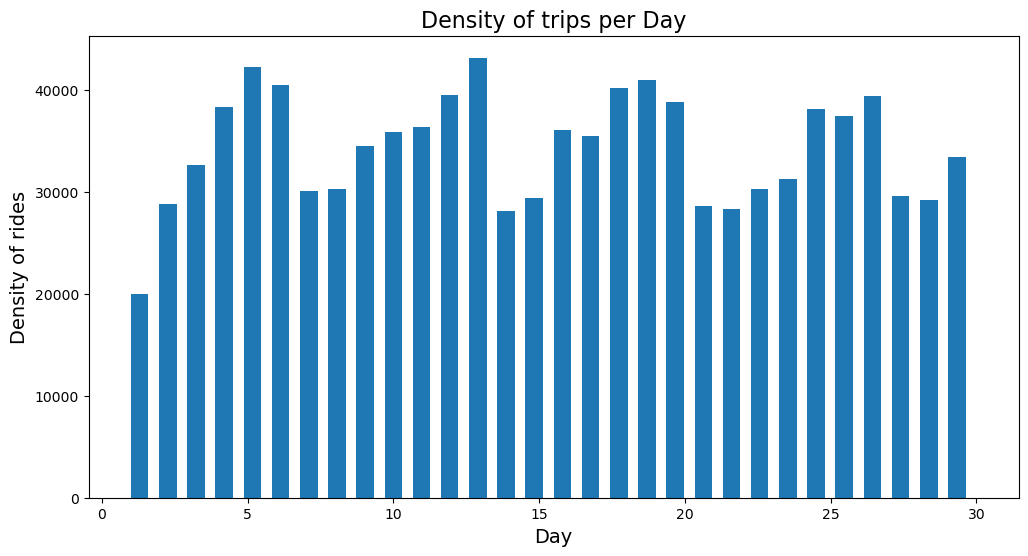

In [51]:
#Visualize the Density of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Day, width= 0.6, bins= 30)
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)
plt.show()

#### From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

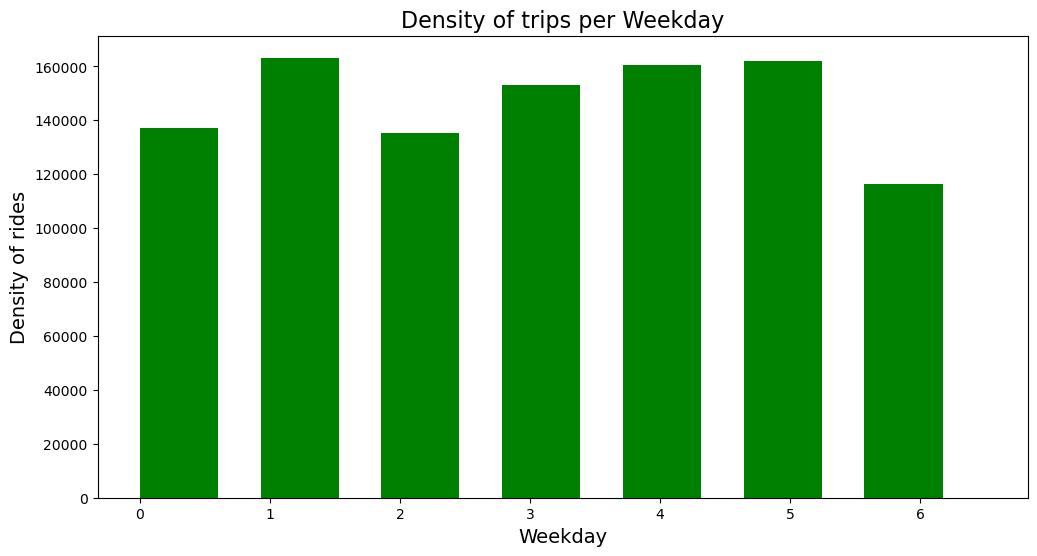

In [50]:
#Visualize the Density of rides per Weekday
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Weekday, width= 0.6, range= (0, 6.5), bins=7, color= "green")
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)
plt.show()

#### The busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the least number of rides.

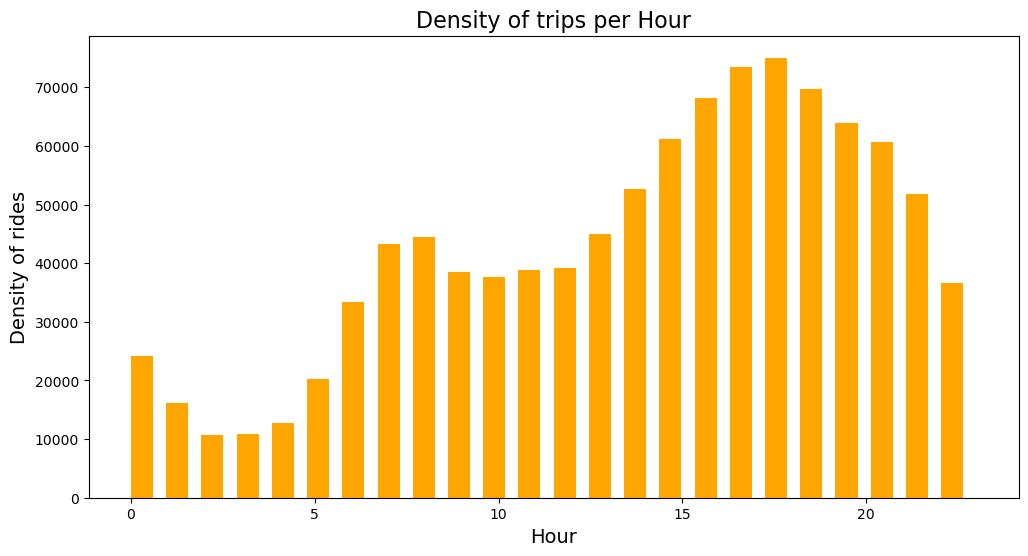

In [48]:
#Visualize the Density of rides per hour
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Hour, width= 0.6, bins=24, color= "orange")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)
plt.show()

#### It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.

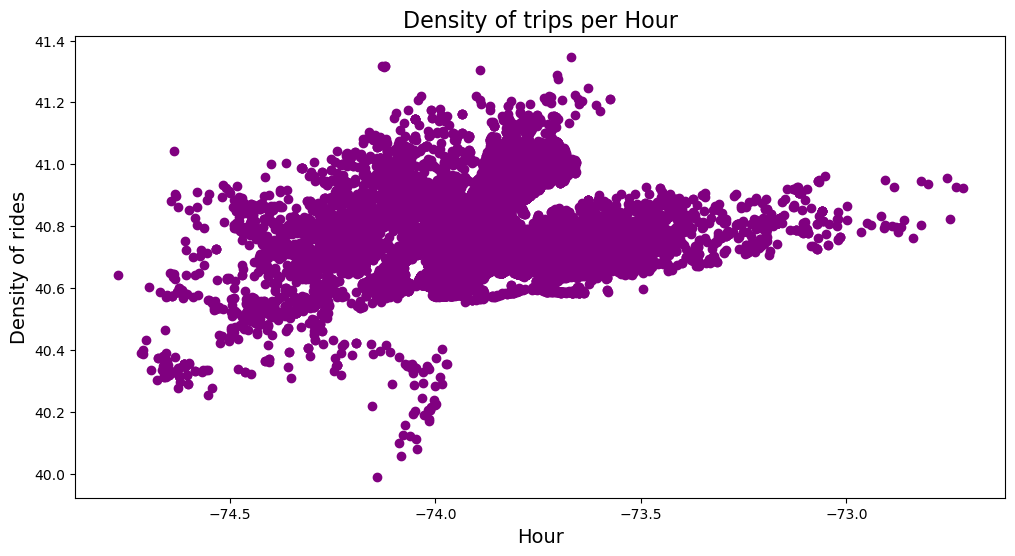

In [49]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= uber_df.Lon
y= uber_df.Lat
plt.scatter(x, y, color= "purple")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)
plt.show()

#### The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.


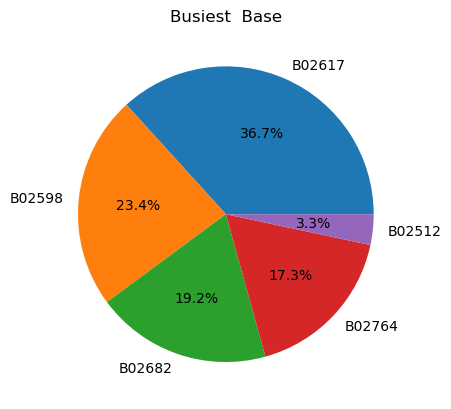

In [47]:
uber_df['Base'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.ylabel("")
plt.title("Busiest  Base")
plt.show()

##### The base B02617 is the busiest base of all while base B02512 is the least used.